#Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset

In [ ]:
df = pd.read_csv("/content/Iris Dataset.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Drop columns that does not benefit the training (Feature Extraction)

In [ ]:
df. drop("Id", axis=1, inplace=True)

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


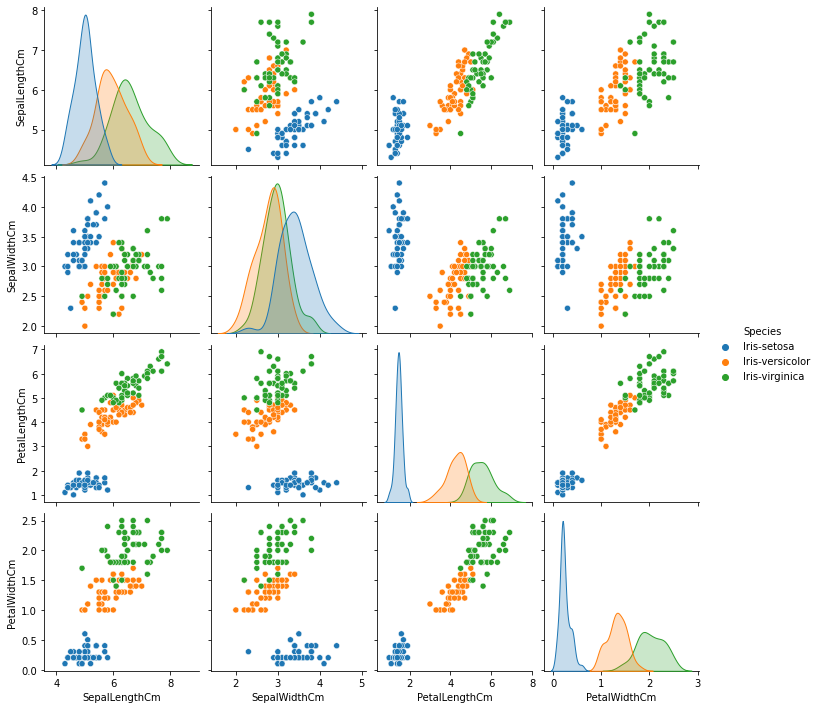

In [ ]:
sns.pairplot(df, hue = 'Species')

In [ ]:
# We're seperating the species column
Species = df["Species"].tolist()
X = df.drop("Species", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


#Standardise the data manually

In [ ]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

#Calculate the correlation matrix manually

In [ ]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

# Plotting the correlation matrix using matplotlib

Text(0.5, 1.0, 'Correlation matrix')

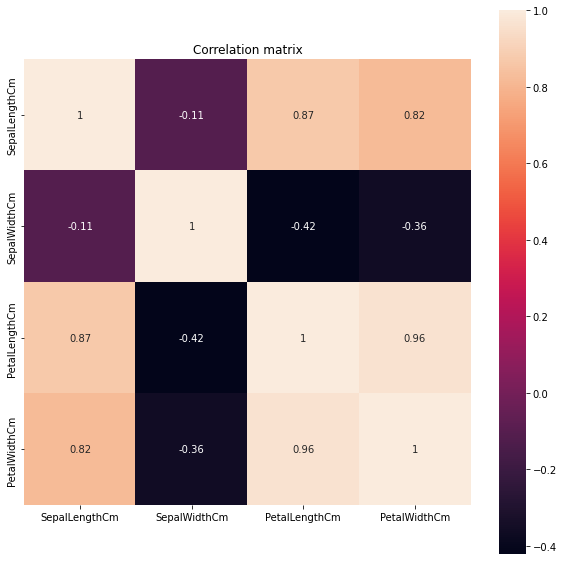

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

#Extraction of Eigen values and their respective eigen vectors

Because it is important to have the sorted list of eigen values/ eigen vectors

This can be calculated using 2 methods

In [ ]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

In [ ]:
# method2
np.linalg.eig(X_corr)

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

# We notice that direction of some vectors is not the same in the two outputs, but still the analysis will still be valid

#Sum of eigen values, we can observe that it is same as number of variables

In [ ]:
np.sum(eig_values)

4.000000000000001

# plotting the variance explained by each PC 

Text(0.5, 0, 'Dimensions')

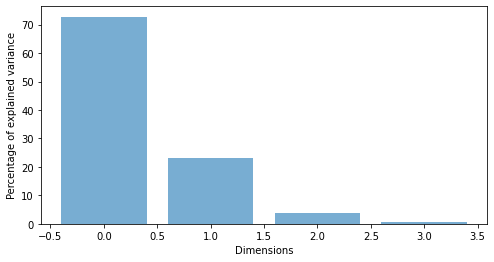

In [ ]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

#This bar chart shows us that the first two dimensions will be enough to represent the data.

In [ ]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

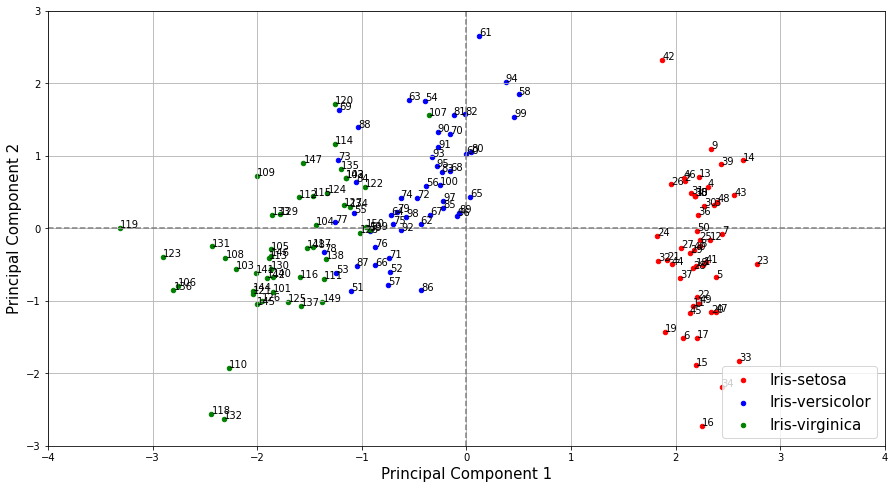

In [ ]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(Species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(Species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

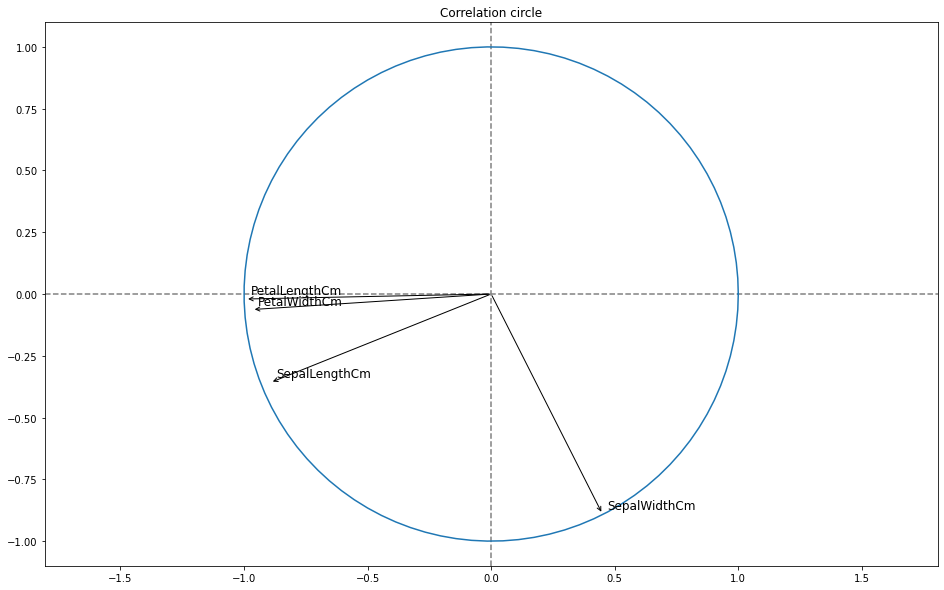

In [ ]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(pc1,pc2)

#Conclusion:
-petal length & petal width are the main things that characterizes the data

-virginica has relatively bigger petals while setosa has the smallest

-a small group of setosa have a relatively big sepal_width